# 0. Imports

In [106]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install python-dotenv
!pip install matplotlib

In [107]:
import pandas as pd
import numpy as np

from dotenv import load_dotenv
load_dotenv()
import os

from sklearn.model_selection import train_test_split

In [108]:
target_col = 'expensive'

# 1. Lendo base

In [109]:
path_raw = os.getenv('PATH_TO_SPLIT')
df = pd.read_csv(r'C:\Users\davim\interp-conf-ml\data\to_split.csv', sep=',')
# df = pd.read_csv(path_raw, sep=',')

In [ ]:
df.sample(1)

# 2. Dividindo entre treino e teste

In [112]:
df_1 = df.copy() 

In [113]:
X = df_1.drop(columns=[target_col])
y = df_1[target_col]

# Separando os dados em treinamento(75%) e teste(25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# 3. Treinamento

## Decision Tree

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


c:\Users\davim\interp-conf-ml\.conda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
434 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\davim\interp-conf-ml\.conda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\davim\interp-conf-ml\.conda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\davim\interp-conf-ml\.conda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(

In [115]:
# from sklearn.tree import plot_tree
# plot_tree(best_model, feature_names=list(X_train.columns))

Accuracy: 0.87


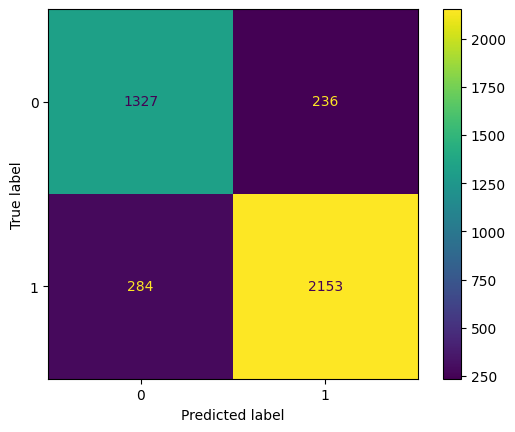

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1563
           1       0.90      0.88      0.89      2437

    accuracy                           0.87      4000
   macro avg       0.86      0.87      0.86      4000
weighted avg       0.87      0.87      0.87      4000



In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the plot
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

## Random forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)

In [118]:
y_pred = rf.predict(X_test)

Accuracy: 0.89


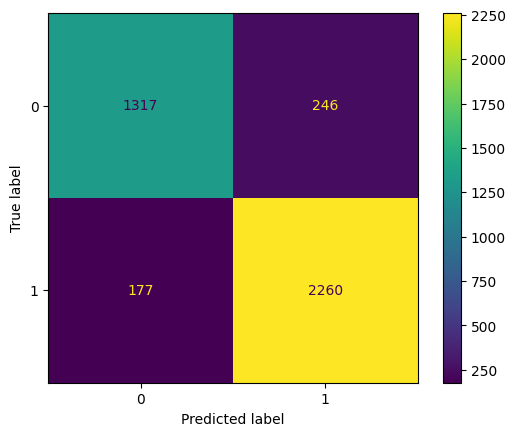

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1563
           1       0.90      0.93      0.91      2437

    accuracy                           0.89      4000
   macro avg       0.89      0.88      0.89      4000
weighted avg       0.89      0.89      0.89      4000



In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the plot
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

### logist regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# lr = make_pipeline(StandardScaler(), LogisticRegression())

lr = LogisticRegression(max_iter = 20000)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

Accuracy: 0.77


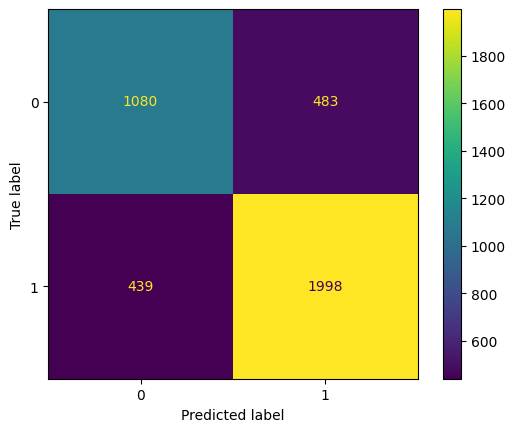

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1563
           1       0.81      0.82      0.81      2437

    accuracy                           0.77      4000
   macro avg       0.76      0.76      0.76      4000
weighted avg       0.77      0.77      0.77      4000



In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the plot
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

### MLP

In [122]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV

# mlp = MLPClassifier()
# #y_pred = mlp.predict(X_test)

# param_grid = {
#     'hidden_layer_sizes': [(128, 128,64),(128, 64)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.001],
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# mlp = grid_search.best_estimator_

In [123]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# # Compute the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Display the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()

# # Show the plot
# plt.show()

In [124]:

# # Print the loss curve
# plt.plot(mlp.loss_curve_)
# plt.title('Loss Curve')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.show()

# # Print training statistics
# print("Training statistics:")
# print(f"Number of iterations: {mlp.n_iter_}")
# print(f"Number of layers: {mlp.n_layers_}")
# print(f"Number of outputs: {mlp.n_outputs_}")
# print(f"Activation function: {mlp.activation}")
# print(f"Learning rate: {mlp.learning_rate}")

# # Print training accuracy
# train_accuracy = mlp.score(X_train, y_train)
# print(f"Training Accuracy: {train_accuracy:.2f}")

## Analise Random FLorest

Primeiro devemos notar que a acuracia top2 do random florest, nosso melhor modelo, foi de 0,55 o que, intuitivamente, parece baixo. Uma valor top2 quer dizer que é considerado correto a isntancia que estiver com maior ou segundo maior score, dado pelo modelo. Ou seja, uma variação de 100 mil reais! Acho que um ser humano, com menor numero de features, é capaz de acertar com mais precisão

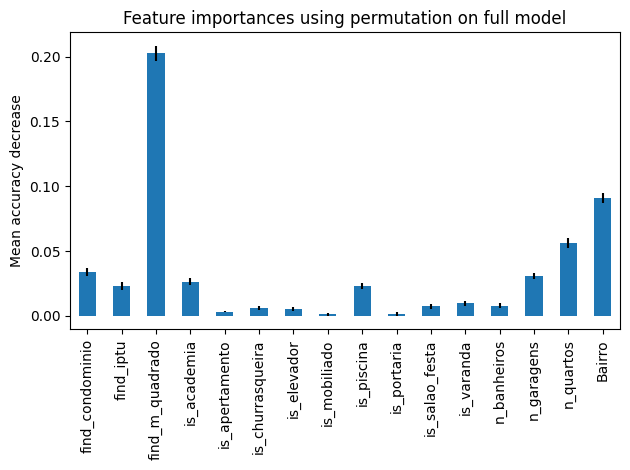

In [125]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, y_test ,n_repeats=100, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Podemos ver algums comportamentos esperados, como a alta correlação de m^2 e o bairro.

A correlação com bairro é interesante, ja que é uma coluna categorica, devemos ver se o modelo aprendeu bem a separar os bairros

Temos 87 bairros:

In [153]:
X_test['Bairro'].describe()

count    4000.000000
mean       34.476000
std        26.469182
min         0.000000
25%        10.000000
50%        23.000000
75%        54.000000
max        87.000000
Name: Bairro, dtype: float64

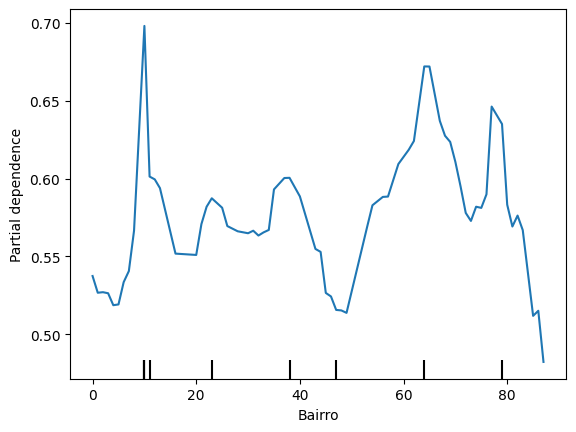

In [148]:
from sklearn.inspection import PartialDependenceDisplay

display  = PartialDependenceDisplay.from_estimator(rf, X_test, [15])

Acredito que esse modelo aprendeu bem a separar um bairro do outro, ja que vemos rapidas mudanças de um para o outro e nenhum sentido crescente ou decrecente.

Quer dizer, alguns bairros ajudam mais que outros a definir o preço do lugar, alguns bairros apresentam muitas residencias caras, enquanto outros, so apresentam residencias baratas. Além disso, alguns são heterogeneos em sua composição e por isso, interferem menos na acuracia

Não tem muita surpresa que metro quadrado é uma feature importante, mas ela parece ser disparado a mais importante

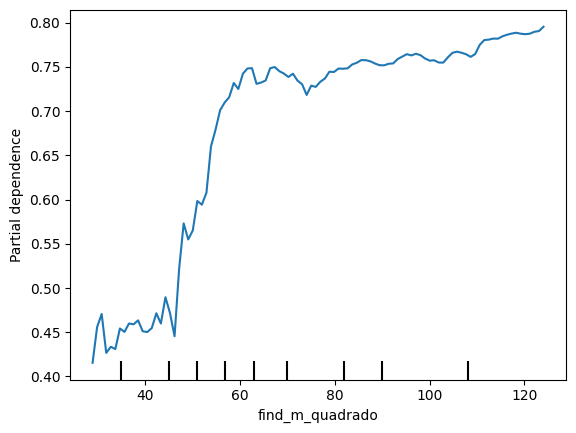

In [155]:
from sklearn.inspection import PartialDependenceDisplay

display  = PartialDependenceDisplay.from_estimator(rf, X_test, [2])

Vemos uma parte baixa no grafico, do inicio até 50 .Quer dizer que quando o metro quadrado é baixo, isso não ajuda muito a saber se o apartamento é caro, provavelmente por que outros fatores, como localização, se tornam bem mais importantes. Enquanto se um apartamento tem mais de 60 m^2 ele definitivamente é caro

o fato do metro quadrado ser tão importante, parece ter diminuido a importancia de features que claramente deveria ajudar como condominio e IPTU

### podemos fazer uma analise aqui sobre a parte mais dificil do dataset, entre 0 metros quadrados e 50

# APAGAR ESSA PARTE DEPOIS:

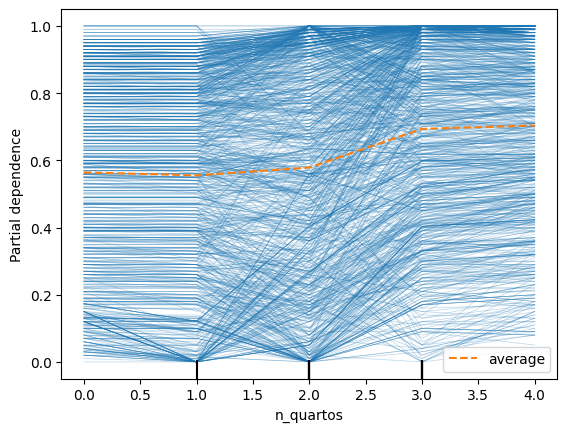

In [162]:
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [14], kind='both')

In [126]:
# Importância das características
importances = rf.feature_importances_
feature_names = X.columns.tolist()
# Mostrar as importâncias
for feature, importance in zip(feature_names, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: find_condominio, Importance: 0.10372630798519611
Feature: find_iptu, Importance: 0.09207217501279777
Feature: find_m_quadrado, Importance: 0.3128468197213643
Feature: is_academia, Importance: 0.022156806390335623
Feature: is_apertamento, Importance: 0.004836293120057455
Feature: is_churrasqueira, Importance: 0.014677116460109363
Feature: is_elevador, Importance: 0.013690868602537078
Feature: is_mobiliado, Importance: 0.008676719195380052
Feature: is_piscina, Importance: 0.019897827376603346
Feature: is_portaria, Importance: 0.014849682858327195
Feature: is_salao_festa, Importance: 0.015265970463366038
Feature: is_varanda, Importance: 0.016940808709021912
Feature: n_banheiros, Importance: 0.029748955439306647
Feature: n_garagens, Importance: 0.06401674278789526
Feature: n_quartos, Importance: 0.11569778790962829
Feature: Bairro, Importance: 0.1508991179680736


In [133]:
list(X_test.columns)

['find_condominio',
 'find_iptu',
 'find_m_quadrado',
 'is_academia',
 'is_apertamento',
 'is_churrasqueira',
 'is_elevador',
 'is_mobiliado',
 'is_piscina',
 'is_portaria',
 'is_salao_festa',
 'is_varanda',
 'n_banheiros',
 'n_garagens',
 'n_quartos',
 'Bairro']

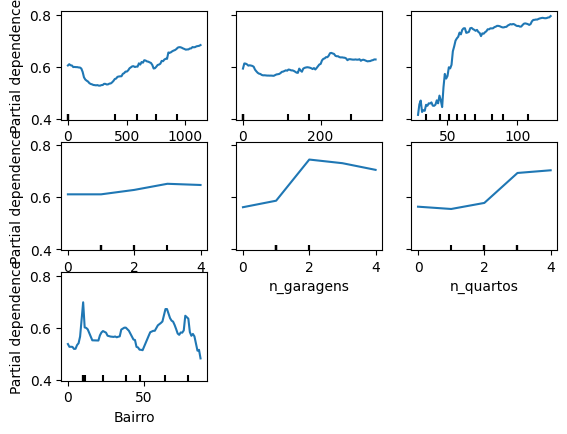

In [145]:
from sklearn.inspection import PartialDependenceDisplay

features = [0,1,2,12,13,14,15]

display  = PartialDependenceDisplay.from_estimator(rf, X_test, features)

In [128]:
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [[1,5,7]],grid_resolution=20, target=[1])

ValueError: Each entry in features must be either an int, a string, or an iterable of size at most 2.

In [ ]:
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [1], kind='both', target=[1])

In [ ]:
from sklearn.decomposition import PCA

# Step 2: Perform PCA
pca = PCA(n_components=2)  # Number of components to keep
principal_components = pca.fit_transform(df_2)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 3: Analyze the results
explained_variance = pca.explained_variance_ratio_

print("Principal Components DataFrame:")
print(pc_df)
print("\nExplained Variance Ratio:")
print(explained_variance)

Gostariamos também de entender relações bivariadas, uma casa com elevador

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(mlp, X_test, y_test ,n_repeats=100, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()